In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
from scipy import stats
import sys
sys.path.append('..')
from madule import utils
from madule import simulation
from madule import plots
from statsmodels.stats.anova import AnovaRM
import arviz as az

### Generate True Parameters For each Participant on Hierarchical level

In [14]:
"""True parameters for each participant are taken from hierarchical level parameters"""

# Number of simulation
simNumber = 3

# Set mean and std of unkown parameters from uniform distribution between 0 and 1
alphaAct_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2,2)), 2)
alphaAct_sd = np.round(np.random.uniform(low=.1, high=.3), 2)

alphaClr_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2,2)), 2)
alphaClr_sd = np.round(np.random.uniform(low=.1, high=.3), 2)

weghtAct_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2,2)), 2)
weghtAct_sd = np.round(np.random.uniform(low=.1, high=.3), 2)

beta_mu = np.round(np.random.uniform(low=.2, high=.8, size= (2)), 2)
beta_sd = np.round(np.random.uniform(low=.005, high=.01), 2)

In [15]:
# Call trueParamAllParts function to generate and save true parameters for each participant
simulation.trueParamAllParts(alphaAct_mu=alphaAct_mu, alphaAct_sd=alphaAct_sd,
                             alphaClr_mu=alphaClr_mu, alphaClr_sd=alphaClr_sd,
                             weghtAct_mu=weghtAct_mu, weghtAct_sd=weghtAct_sd,
                             beta_mu=beta_mu, beta_sd=beta_sd,
                             simNumber=simNumber)

All true parameters for each participant have been generated successfully!


In [16]:
# Simulation RL Data
simulation.simulateActClrAllParts(simNumber=simNumber)

# Pooling data all data and then save it

# List of subjects
subList = ['sub-004', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030', 'sub-033',
           'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-045', 'sub-047', 
           'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 'sub-060', 'sub-064', 
           'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 'sub-074', 'sub-075', 
           'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081', 'sub-082',
           'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 'sub-090', 'sub-092', 
           'sub-108', 'sub-109']

# Group level
randomGroupLabel = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/randomGroupLabel.csv')
# concatenating data
dataAll = pd.DataFrame([])
for subName in subList:
    # Main directory of the subject
    subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
    
    # Making empty Dataframe to be concatenated in all four .csv file of the subject
    dirc = subMainDirec + subName + '/' + str(simNumber) + '/' + subName + '-simulated-data-with-task-design-true-param.csv'
    data = pd.read_csv(dirc)

    # set the name of participants to each data
    data['sub_ID'] = subName
    # read and then set the number of group
    labelSes1 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-02'])
    labelSes2 = int(randomGroupLabel.loc[randomGroupLabel['sub-ID'] == subName, 'ses-03'])
    data.loc[data['session'] == 1, 'group'] = str(labelSes1)
    data.loc[data['session'] == 2, 'group'] = str(labelSes2)
    
    # Concatenating each data
    dataAll = pd.concat([dataAll, data])    
    
# Save concatenated data over all particiapnts
dataAll.to_csv(subMainDirec + 'hierParam/'  + str(simNumber) + '/' +'hier-simulated-data-with-task-design-true-param.csv', index=False)

All simulations have been done successfully!


In [19]:
subMainDirec + 'hierParam/'  + str(simNumber) + '/' +'hier-simulated-data-with-task-design-true-param.csv'

'/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/hierParam/1/hier-simulated-data-with-task-design-true-param.csv'

## Choice Proportion and RT in Group 2

In [70]:
# Save concatenated data over group lable 2
dataAllGroup2 = dataAll.loc[dataAll['group']=='2']
dataAllGroup2.to_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/First-level-analysis/Sim/simALLGroup2_' + str(simNumber) + '.csv', index=False)

In [71]:
# Repeated mesure ANOVA in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup2, depvar='correctChoice', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
session,0.8416,1.0000,22.0000,0.3689
block,2.2782,1.0000,22.0000,0.1454
session:block,0.1701,1.0000,22.0000,0.6840


## Choice Proportion and RT in Group 1 and 2

In [72]:
## Choice Proportion and RT in Group 1 and 3
dataAllGroup13 = dataAll.loc[(dataAll['group']=='1') | (dataAll['group']=='3')]
dataAllGroup13.to_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/First-level-analysis/Sim/simALLGroup3_' + str(simNumber) + '.csv', index=False)

In [76]:
# Repeated mesure ANOVA across session in choice proportion
aovrm2way = AnovaRM(data = dataAllGroup13, depvar='correctChoice', subject = 'sub_ID',
                    within=['session','block'], aggregate_func='mean')
res2way = aovrm2way.fit()
res2way.summary()

,F Value,Num DF,Den DF,Pr > F
group,0.0799,1.0000,20.0000,0.7804
block,2.4946,1.0000,20.0000,0.1299
group:block,0.0092,1.0000,20.0000,0.9246


## Figure of simulated data

In [50]:
# List of subjects
subList = ['sub-004', 'sub-012', 'sub-020', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-045',
           'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 'sub-060',
           'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 'sub-074',
           'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 'sub-081',
           'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 'sub-090',
           'sub-092', 'sub-108', 'sub-109']
# Number of simulation
simNumber = 1

# Main directory of the subject
parent_dir = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/'


# Simulation for participant
for subName in subList:

    direct  = parent_dir + subName + '/' + str(simNumber) + '/'
    # Read predefined task design with true parameters
    simulated_data = pd.read_csv(direct + subName +'-simulated-data-with-task-design-true-param.csv')
    #save file name
    saveFile = parent_dir + subName + '/' + str(simNumber) + '/' + subName +'_simData'
    plots.plotChosenCorrect(data = data, subName = subName, saveFile = saveFile)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

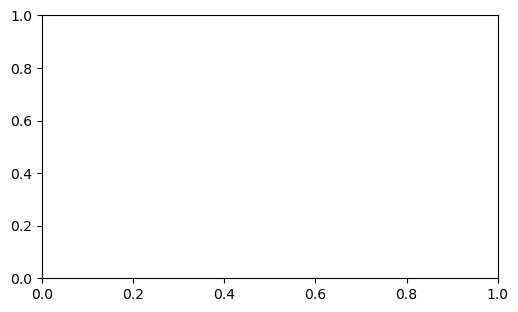

In [19]:
#!/mrhome/amingk/anaconda3/bin/python

import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sys
sys.path.append('..')
from madule import utils
from madule import plots
import nest_asyncio

# If you want to model fit or just recall ex model fit
modelFit = False

# Number of simulation
simNumber = 1

# Number of chains in MCMC procedure
nChains = 1
# The number of iteration or samples for each chain in MCM procedure
nSamples=2
# Main directory of simulated data
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/simulation/' 
# Directory of the simulated subject
dirc = subMainDirec + 'hierParam/'  + str(simNumber) + '/' +'hier-simulated-data-with-task-design-true-param.csv'
# read simulated dat 
data = pd.read_csv(dirc)
    
# The adrees name of pickle file
pickelDir = subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'hier_RL_hier_3_sim.pkl'
if modelFit == True: 
    """Fitting data to model and then save as pickle file in the subject directory if modelFit = True"""
    # data from group label 2 particiapnt
    dataGroup2 = data.loc[data['group']==2]   

    nCond = 2 
    nSes = 2 
    # number of participant
    nParts = len(np.unique(dataGroup2.sub_ID))
    # participant indeces
    participant = dataGroup2.sub_ID.replace(np.unique(dataGroup2.sub_ID),
                          np.arange(1, nParts +1, 1))
    # condition indeces
    condition = dataGroup2.block.replace('Act',1).replace('Stim',2)

    # Put required data for stan model
    dataStan = {'N':int(dataGroup2.shape[0]),  
                'nParts': nParts,
                'nCond':2, 
                'nSes':2, 
                'pushed':np.array(dataGroup2.pushed).astype(int),  
                'yellowChosen':np.array(dataGroup2.yellowChosen).astype(int), 
                'winAmtPushable':np.array(dataGroup2.winAmtPushable).astype(int), 
                'winAmtYellow':np.array(dataGroup2.winAmtYellow).astype(int), 
                'rewarded':np.array(dataGroup2.correctChoice).astype(int),  
                'p_push_init':.5, 
                'p_yell_init':.5,        
                'participant':np.array(participant).astype(int),      
                'session':np.array(dataGroup2.session).astype(int),
                'condition':np.array(condition).astype(int)}    
    
    
    # initial sampling
    initials = [] 
    for c in range(0, nChains):
        chaininit = {
            'alphaAct_sd': np.random.uniform(.05, .2),
            'alphaClr_sd': np.random.uniform(.05, .2),        
            'weightAct_sd': np.random.uniform(.05, .2),
            'sensitivity_sd': np.random.uniform(.05, .2),
            'alphaAct_hier': np.random.uniform(.3, .7, size=(nSes, nCond)),
            'alphaClr_hier': np.random.uniform(.3, .7, size=(nSes, nCond)),
            'weightAct_hier': np.random.uniform(.3, .7, size=(nSes, nCond)),        
            'sensitivity_hier': np.random.uniform(.1, .1, size=(nSes)),
            'alphaAct': np.random.uniform(.1, .9, size=(nParts, nSes, nCond)),       
            'alphaClr': np.random.uniform(.1, .9, size=(nParts, nSes, nCond)),
            'weightAct': np.random.uniform(.1, .9, size=(nParts, nSes, nCond)),   
            'sensitivity': np.random.uniform(.1, .2, size=(nParts, nSes))
        }
        initials.append(chaininit)   

    # Loading the RL Stan Model
    file_name = '../stan_models/RL_hier_3.stan' 
    file_read = open(file_name, 'r')
    stan_model = file_read.read()
    # Use nest-asyncio.This package is needed because Jupter Notebook blocks the use of certain asyncio functions
    nest_asyncio.apply()
    # Building Stan Model realted to our proposed model
    posterior = stan.build(stan_model, data = dataStan)
    # Start for taking samples from parameters in the Stan Model
    fit = posterior.sample(num_chains=nChains, num_samples=nSamples, init = initials)
    # Save Model Fit
    utils.to_pickle(stan_fit=fit, save_path = pickelDir)
else:
    """Loading the pickle file of model fit from the subject directory if modelFit = False"""
    loadPkl = utils.load_pickle(load_path=pickelDir)
    fit = loadPkl['fit']
    
# Extracting posterior distributions for each of four main unkhown parameters
weightAct = np.random.normal(1, 10, 10000).reshape(2,2, -1)

alphaAct = np.random.normal(1, 10, 10000).reshape(2,2, -1)

alphaClr = np.random.normal(1, 10, 10000).reshape(2,2, -1)

sensitivity = np.random.normal(1, 10, 10000).reshape(2, -1)


# Weightening Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
ax = plt.gca()
# Get ground truth
trueValue = np.unique(data.loc[(data['session']==1) & (data['block']=='Act')]['weghtAct'])
plots.plot_posterior(x=weightAct[0,0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Act, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 2)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==1) & (data['block']=='Stim')]['weghtAct'])
plots.plot_posterior(x=weightAct[0,1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Clr, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 3)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==2) & (data['block']=='Act')]['weghtAct'])
plots.plot_posterior(x=weightAct[1,0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 2 Act, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 4)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==2) & (data['block']=='Stim')]['weghtAct'])
plots.plot_posterior(x=weightAct[1,1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 2 Clr, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')

fig.savefig(subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'hier_RL_hier_3_weightening_sim.png', dpi=300)
 
# sensitivity Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
ax = plt.gca()
# Get ground truth
trueValue = np.unique(data.loc[data['session']==1]['beta'])
plots.plot_posterior(x=sensitivity[0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 2)
ax = plt.gca()
trueValue = np.unique(data.loc[data['session']==1]['beta'])
plots.plot_posterior(x=sensitivity[1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1, Hierarchical Weightening',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')

fig.savefig(subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'hier_RL_hier_3_sim.png', dpi=300)


# Action Learning Rate Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
ax = plt.gca()
# Get ground truth
trueValue = np.unique(data.loc[(data['session']==1) & (data['block']=='Act')]['alphaAct'])
plots.plot_posterior(x=alphaAct[0,0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Act, Hierarchical Action Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 2)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==1) & (data['block']=='Stim')]['alphaAct'])
plots.plot_posterior(x=alphaAct[0,1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Clr, Hierarchical Action Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 3)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==2) & (data['block']=='Act')]['alphaAct'])
plots.plot_posterior(x=alphaAct[1,0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 2 Act, Hierarchical Action Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 4)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==2) & (data['block']=='Stim')]['alphaAct'])
plots.plot_posterior(x=alphaAct[1,1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 2 Clr, Hierarchical Action Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')

fig.savefig(subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'hier_RL_hier_3_alphaAct_sim.png', dpi=300)



# Color Learning Rate Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

fig.add_subplot(rows, columns, 1)
ax = plt.gca()
# Get ground truth
trueValue = np.unique(data.loc[(data['session']==1) & (data['block']=='Act')]['alphaClr'])
plots.plot_posterior(x=alphaClr[0,0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Act, Hierarchical Color Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 2)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==1) & (data['block']=='Stim')]['alphaClr'])
plots.plot_posterior(x=alphaClr[0,1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 1 Clr, Hierarchical Color Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 3)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==2) & (data['block']=='Act')]['alphaClr'])
plots.plot_posterior(x=alphaClr[1,0], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 2 Act, Hierarchical Color Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')
fig.add_subplot(rows, columns, 4)
ax = plt.gca()
trueValue = np.unique(data.loc[(data['session']==2) & (data['block']=='Stim')]['alphaClr'])
plots.plot_posterior(x=alphaClr[1,1], 
                     ax=ax, 
                     trueValue=trueValue, 
                     title = 'Ses 2 Clr, Hierarchical Color Learning Rate',
                     ylabel = 'Density',
                     xlabel = '$w_{(A)}$')

fig.savefig(subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'hier_RL_hier_3_alphaClr_sim.png', dpi=300)


In [21]:
hierFile = subMainDirec + 'hierParam/'  + str(simNumber) + '/'  +'hier-Mean-Std-True-Param.csv'
dataHier = pd.read_csv(hierFile)



In [22]:
dataHier

,label,hierAlphaAct_mu,hierAlphaAct_sd,hierAlphaClr_mu,hierAlphaClr_sd,hierWeghtAct_mu,hieWeghtAct_sd,hierbeta_mu,hieBeta_sd
0,Act-session1,0.32,0.19,0.76,0.2,0.56,0.24,2.38,0.23
1,Stim-session1,0.30,0.19,0.76,0.2,0.27,0.24,2.38,0.23
2,Act-session2,0.53,0.19,0.24,0.2,0.42,0.24,0.90,0.23
3,Stim-session2,0.61,0.19,0.79,0.2,0.68,0.24,0.90,0.23


In [25]:
dataHier['hierAlphaAct_mu'][0]


0.32